# Unemployment Analysis at the U.S. National Level

by A.Narag |
February 15, 2023

In [43]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import os
import csv
import scipy.stats as st
from scipy.stats import linregress

Get the Unemployment Rates from the CSV Outpile created by the bls_api_merge_CSV Jupyter notebook

- Unemployment_Rates.csv
- Merged_Covid_CPI.csv

In [44]:
# Select the columns to include in the DataFrame from the Unemployment Rates CSV file
included_columns = ['Unnamed: 0', 'Unemployment Rate (S)', 'Unemployment Rate (U)', 'Women (S)','Men (S)', 'Part-Time Workers (S)', 'Full-Time Workers (S)']

# Open the csv file and create a DataFrame
unemployment_df = pd.read_csv('../output/Unemployment_Rates.csv', usecols=included_columns)

# Rename the Unnamed column to Date
unemployment_df = unemployment_df.rename(columns={'Unnamed: 0':'Date'})

# Change the Date data type to DateTime
unemployment_df['Date'] = pd.to_datetime(unemployment_df['Date']).dt.normalize()

# Display the DataFrame
unemployment_df.head()

,Date,Unemployment Rate (S),Unemployment Rate (U),Women (S),Men (S),Part-Time Workers (S),Full-Time Workers (S)
0,2018-01-01,4.0,4.5,4.0,4.1,4.6,3.9
1,2018-02-01,4.1,4.4,4.1,4.0,4.6,4.0
2,2018-03-01,4.0,4.1,4.0,4.0,4.4,3.9
3,2018-04-01,4.0,3.7,3.9,4.1,4.2,3.9
4,2018-05-01,3.8,3.6,3.6,4.0,4.2,3.7


In [45]:
# check the data types
unemployment_df.dtypes

Date                     datetime64[ns]
Unemployment Rate (S)           float64
Unemployment Rate (U)           float64
Women (S)                       float64
Men (S)                         float64
Part-Time Workers (S)           float64
Full-Time Workers (S)           float64
dtype: object

Since the Merged_Covid_CPI.csv only has data from 2020, will take data from the CPIAUCSL.csv file on the 'resource' folder
This data will be merged into the Unemployment Rates

In [46]:
# Open the CPIAUCSL csv file and create a DataFrame
cpi_df = pd.read_csv('../resource/CPIAUCSL.csv')

# Rename the columns
cpi_df.columns = ['Date', 'CPI']

# Convert the Date into a DateTime format and CPI to float
cpi_df['Date'] = pd.to_datetime(cpi_df['Date']).dt.normalize()
cpi_df['CPI']  = cpi_df['CPI'].astype(float)

# Sort on Date and reset index
cpi_df = cpi_df.sort_values('Date', ascending=True)
cpi_df = cpi_df.reset_index(drop=True)

# Merge the unemployment_rates_time_df with cpi_df
unemployment_cpi_df = pd.merge(unemployment_df, cpi_df, on=['Date', 'Date'], how='left')

# Save the merged data into a new file
#unemployment_cpi_df.to_csv('../output/Merged_Unemployment_CPI.csv', index=False)

# Display results of merge
unemployment_cpi_df.head()

,Date,Unemployment Rate (S),Unemployment Rate (U),Women (S),Men (S),Part-Time Workers (S),Full-Time Workers (S),CPI
0,2018-01-01,4.0,4.5,4.0,4.1,4.6,3.9,248.743
1,2018-02-01,4.1,4.4,4.1,4.0,4.6,4.0,249.439
2,2018-03-01,4.0,4.1,4.0,4.0,4.4,3.9,249.581
3,2018-04-01,4.0,3.7,3.9,4.1,4.2,3.9,250.146
4,2018-05-01,3.8,3.6,3.6,4.0,4.2,3.7,250.779


In [47]:
# check the data types
unemployment_cpi_df.dtypes

Date                     datetime64[ns]
Unemployment Rate (S)           float64
Unemployment Rate (U)           float64
Women (S)                       float64
Men (S)                         float64
Part-Time Workers (S)           float64
Full-Time Workers (S)           float64
CPI                             float64
dtype: object

In [48]:
# Select the columns to include in the DataFrame from the Merged_Covid_CPI CSV file
included_columns2 = ['Date', 'Total']

# Open the csv file and create a DataFrame
covid_df = pd.read_csv('../output/Merged_Covid_CPI.csv', usecols=included_columns2)

# Rename Total to Covid19 Cases; Total is the total cases for all the states & territories included in the file
covid_df = covid_df.rename(columns={'Total':'Covid19 Cases'})

# Change the Date data type to DateTime
covid_df['Date'] = pd.to_datetime(covid_df['Date']).dt.normalize()

covid_df.head()

,Date,Covid19 Cases
0,2020-01-01,14.0
1,2020-02-01,35.0
2,2020-03-01,378228.0
3,2020-04-01,1744078.0
4,2020-05-01,1389120.0


In [49]:
# Merge the unemployment_cpi_df with covid_df
merged_df = pd.merge(unemployment_cpi_df, covid_df, on=['Date', 'Date'], how='left')

# For any values that did not convert (NaN value), replace with 0
merged_df = merged_df.fillna(0)

# Create a new column just for year
merged_df['Year'] = merged_df['Date'].dt.year

merged_df.tail()

,Date,Unemployment Rate (S),Unemployment Rate (U),Women (S),Men (S),Part-Time Workers (S),Full-Time Workers (S),CPI,Covid19 Cases,Year
55,2022-08-01,3.7,3.8,3.5,3.8,4.1,3.6,295.620,6264512.0,2022
56,2022-09-01,3.5,3.3,3.4,3.6,3.7,3.5,296.761,3601515.0,2022
57,2022-10-01,3.7,3.4,3.7,3.7,3.9,3.7,298.062,2214841.0,2022
58,2022-11-01,3.6,3.4,3.6,3.7,4.4,3.5,298.349,2587189.0,2022
59,2022-12-01,3.5,3.3,3.6,3.4,3.9,3.4,298.112,3838461.0,2022


# Calculate Statistics on the Unemployment Rates from 2018 to 2022

 - Use the Seasonally Adjusted Rates
 - Find if there are any outliers

In [50]:

# Demonstrate calculating measures of central tendency
mean_numpy = np.mean(merged_df['Unemployment Rate (S)'])
print(f"The mean unemployment rate from 2018 to 2022 is {mean_numpy}")

median_numpy = np.median(merged_df['Unemployment Rate (S)'])
print(f"The median unemployment rate from 2018 to 2022 is {median_numpy}")

mode_scipy = st.mode(merged_df['Unemployment Rate (S)'])
print(f"The mode unemployment rate from 2018 to 2022 is {mode_scipy}")

# Calculate the min and max unemployment rates
max_rate = merged_df['Unemployment Rate (S)'].max()
print(f"The max unemployment rate from 2018 to 2022 is {max_rate}")

min_rate = merged_df['Unemployment Rate (S)'].min()
print(f"The min unemployment rate from 2018 to 2022 is {min_rate}")

# Calculate the variance and standard deviation
var_numpy = np.var(merged_df['Unemployment Rate (S)'],ddof = 0)
print(f"The population variance using the NumPy module is {var_numpy}")

sd_numpy = np.std(merged_df['Unemployment Rate (S)'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_numpy}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_numpy-sd_numpy,3)} and {round(mean_numpy+sd_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_numpy-2*sd_numpy,3)} and {round(mean_numpy+2*sd_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_numpy-3*sd_numpy,3)} and {round(mean_numpy+3*sd_numpy,3)}")

The mean unemployment rate from 2018 to 2022 is 4.935000000000001
The median unemployment rate from 2018 to 2022 is 3.8499999999999996
The mode unemployment rate from 2018 to 2022 is ModeResult(mode=array([3.6]), count=array([10]))
The max unemployment rate from 2018 to 2022 is 14.7
The min unemployment rate from 2018 to 2022 is 3.5
The population variance using the NumPy module is 5.432608333333333
The population standard deviation using the NumPy module is 2.330795643837815
Roughly 68% of the data is between 2.604 and 7.266
Roughly 95% of the data is between 0.273 and 9.597
Roughly 99.7% of the data is between -2.057 and 11.927


Analyzing the Statistics

 -  The statistics suggests that the distribution of the Unemployment Rate Data from 2018 to 2022 is positively skewed because the mean of 4.935000000000001 is greater than both the median of 3.8499999999999996 and mode of 3.6.  This further means the tail of a distribution curve is longer on the right side and the outliers of the distribution curve are further out towards the right. 

 - The max of 14.7 and min of 3.5 of the unemployment rate are significantly higher and lower than the mean of 4.935000000000001, respectively, indicating that the distribution is spread out and has some extreme values.

 - The standard deviation of 2.330795643837815 is relatively small compared to the mean of 4.935000000000001, which suggests that the majority of the data points are close to the mean and that the distribution is relatively tight.

 - The fact that roughly 68% of the data falls between 2.604 and 7.266, and roughly 95% of the data falls between 0.273 and 9.597, further confirms that the distribution is tight and that most of the data points are close to the mean.

Overall, the data provides some evidence that the unemployment rate is distributed tightly around the mean, with a small spread and only a few extreme values, eventhough it is positively skewed. 



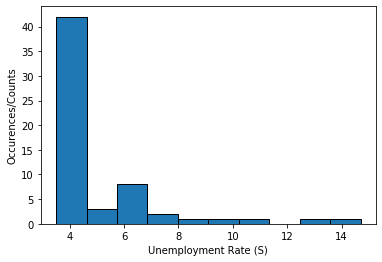

NormaltestResult(statistic=27.358227433108844, pvalue=1.1461366378374627e-06)


In [51]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(merged_df['Unemployment Rate (S)'], edgecolor='black')
plt.xlabel('Unemployment Rate (S)')
plt.ylabel('Occurences/Counts')
plt.show()
# Using sample size of 20 based on 60 months of unemployment rates (12 months x 5 years)
print(st.normaltest(merged_df['Unemployment Rate (S)'].sample(20)))

In [52]:
# Run normalty test on the entire population of 60
print(st.normaltest(merged_df['Unemployment Rate (S)'].sample(60)))

NormaltestResult(statistic=48.42763549831136, pvalue=3.0484043012009236e-11)


Normality Test

Many statistical tests make the assumption that datasets are normally distributed.  Conducting a normality test on the Unemployment Rates will show if it is normally distributed or not. And will further confirm what the data statistics showed, the unemployment rates between 2018 to 2022 are not normally distributed and positively skewed. 

Based on the histogram, it shows majority of the data are clustered on the left side and more spread out on the right side. Furthermore, the normality test came back with pvalue=3.0484043012009236e-11 (.0000000000030484), when calculating for the entire population, and pvalue=1.7769255437479665e-09 (.00000000017769), for a smaller sample of 20.  The p-value represents the probability of observing a test statistic as extreme or more extreme than the one computed from the data, assuming that the data is normally distributed.

Below are the accepted measurements for statistical significance:
    Insignificant: Greater than 0.10
    Marginally significant: Less than or equal to 0.10 and greater than 0.05
    Significant: Less than or equal to 0.05

Since the p-values calculated are less than 0.05, it further confirms that the data is not normally distributed.


In [53]:
# Demonstrate calculating the z-scores using SciPy
z_scipy = st.zscore(merged_df['Unemployment Rate (S)'])
print(f"The z-scores using the SciPy module are {z_scipy}")

The z-scores using the SciPy module are [-0.40115057 -0.35824677 -0.40115057 -0.40115057 -0.48695818 -0.40115057
 -0.48695818 -0.48695818 -0.52986198 -0.48695818 -0.48695818 -0.44405437
 -0.40115057 -0.48695818 -0.48695818 -0.57276579 -0.52986198 -0.57276579
 -0.52986198 -0.52986198 -0.61566959 -0.57276579 -0.57276579 -0.57276579
 -0.61566959 -0.61566959 -0.22953535  4.18955648  3.54599942  2.60211573
  2.25888529  1.48661682  1.2720978   0.84305975  0.75725214  0.75725214
  0.58563693  0.54273312  0.49982932  0.49982932  0.37111791  0.41402171
  0.19950269  0.11369508 -0.05792014 -0.18663155 -0.31534296 -0.44405437
 -0.40115057 -0.48695818 -0.57276579 -0.57276579 -0.57276579 -0.57276579
 -0.61566959 -0.52986198 -0.61566959 -0.52986198 -0.57276579 -0.61566959]


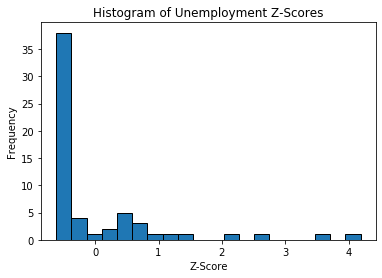

In [54]:
plt.hist(z_scipy, bins=20, edgecolor='black')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Histogram of Unemployment Z-Scores')
plt.show()

Looking at the Z-Score

A z-score, or a standard score, is a numerical representation of how many standard deviations a particular value is away from the mean of a data set. The z-score is calculated by subtracting the mean of the data set from each data point, and then dividing the result by the standard deviation of the data set.

Converting the values into z-scores can normalize the data and compare the values on a common scale. It can help identify values that are significantly different from the mean.

We can see that we have several unemployment rates that can be considered outliers based on the high z-scores (4.18955648  3.54599942  2.60211573 2.25888529  1.48661682  1.2720978).

In [55]:
# Since the data is in a dataframe, use pandas to give quartile calculations
quartiles = merged_df['Unemployment Rate (S)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Unemployment Rates 2018 to 2022 is: {lowerq}")
print(f"The upper quartile of Unemployment Rates 2018 to 2022 is: {upperq}")
print(f"The interquartile range of Unemployment Rates 2018 to 2022 is: {iqr}")
print(f"The the median of Unemployment Rates 2018 to 2022 is: {quartiles[.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Unemployment Rates 2018 to 2022 is: 3.6
The upper quartile of Unemployment Rates 2018 to 2022 is: 5.500000000000001
The interquartile range of Unemployment Rates 2018 to 2022 is: 1.9000000000000008
The the median of Unemployment Rates 2018 to 2022 is: 3.8499999999999996 
Values below 0.7499999999999987 could be outliers.
Values above 8.350000000000001 could be outliers.


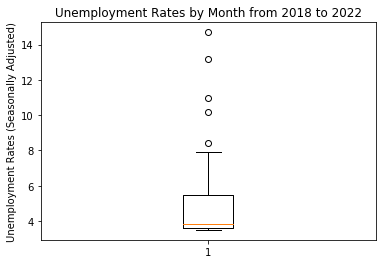

In [56]:
# Example outlier plot of reaction times
rates = [merged_df['Unemployment Rate (S)']]
# times = [96,98,100,105,95,100,101,102,97,98]
fig1, ax1 = plt.subplots()
ax1.set_title('Unemployment Rates by Month from 2018 to 2022')
ax1.set_ylabel('Unemployment Rates (Seasonally Adjusted)')
ax1.boxplot(rates)

# Save the figure
plt.savefig('../output/Unemployment_Rates_2018-2022_BoxPlot.png', dpi=300)

# Display plot
plt.show()

Quartiles and Box Plots

Box and whisker plots, sometimes known as box plots, can also show the distribution of data points across a selected measure.

For Unemployment Rates from 2018 to 2022, half of the data points are within the box of the box plot and is between the lower and upper quartile of 3.6 and 5.500000000000001. The line in the middle of the box represents the median of 3.8499999999999996.  The box plot also shows several outliers above the value of 8.350000000000001. 

This further emphasizes that our data is not normally distributed. 


# Calculating Statistics on Covid19 cases and CPI

Statistics for Covid19 Cases

In [57]:
# Demonstrate calculating measures of central tendency
mean_covid_numpy = np.mean(merged_df['Covid19 Cases'])
print(f"The mean Covid19 Cases from 2018 to 2022 is {mean_covid_numpy}")

median_covid_numpy = np.median(merged_df['Covid19 Cases'])
print(f"The median Covid19 Cases from 2018 to 2022 is {median_covid_numpy}")

mode_covid_scipy = st.mode(merged_df['Covid19 Cases'])
print(f"The mode Covid19 Cases from 2018 to 2022 is {mode_covid_scipy}")

# Calculate the min and max 
max_covid_rate = merged_df['Covid19 Cases'].max()
print(f"The max Covid19 Cases from 2018 to 2022 is {max_covid_rate}")

min_covid_rate = merged_df['Covid19 Cases'].min()
print(f"The min Covid19 Cases from 2018 to 2022 is {min_covid_rate}")

# Calculate the variance and standard deviation
var_covid_numpy = np.var(merged_df['Covid19 Cases'],ddof = 0)
print(f"The population variance using the NumPy module is {var_covid_numpy}")

sd_covid_numpy = np.std(merged_df['Covid19 Cases'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_covid_numpy}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_covid_numpy-sd_covid_numpy,3)} and {round(mean_covid_numpy+sd_covid_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_covid_numpy-2*sd_covid_numpy,3)} and {round(mean_covid_numpy+2*sd_covid_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_covid_numpy-3*sd_covid_numpy,3)} and {round(mean_covid_numpy+3*sd_covid_numpy,3)}")

The mean Covid19 Cases from 2018 to 2022 is 3297307.3333333335
The median Covid19 Cases from 2018 to 2022 is 1713657.5
The mode Covid19 Cases from 2018 to 2022 is ModeResult(mode=array([0.]), count=array([24]))
The max Covid19 Cases from 2018 to 2022 is 39913804.0
The min Covid19 Cases from 2018 to 2022 is 0.0
The population variance using the NumPy module is 34230964298366.15
The population standard deviation using the NumPy module is 5850723.399577709
Roughly 68% of the data is between -2553416.066 and 9148030.733
Roughly 95% of the data is between -8404139.466 and 14998754.132
Roughly 99.7% of the data is between -14254862.865 and 20849477.532


The z-scores using the SciPy module are [-0.56357259 -0.56357259 -0.56357259 -0.56357259 -0.56357259 -0.56357259
 -0.56357259 -0.56357259 -0.56357259 -0.56357259 -0.56357259 -0.56357259
 -0.56357259 -0.56357259 -0.56357259 -0.56357259 -0.56357259 -0.56357259
 -0.56357259 -0.56357259 -0.56357259 -0.56357259 -0.56357259 -0.56357259
 -0.5635702  -0.56356661 -0.49892622 -0.26547646 -0.32614554 -0.27587534
  0.07686155 -0.05859179 -0.16005633  0.08420286  0.94352327  1.63487128
  1.49928805  0.24544463  0.04552713  0.07025604 -0.25520029 -0.43065398
 -0.11688406  0.88071668  0.82814215  0.27723387  0.29061426  1.54868297
  6.25845629  0.75138481 -0.21603488 -0.14642827  0.39387295  0.55980764
  0.66901243  0.50715176  0.05199488 -0.1850141  -0.12137274  0.09249346]


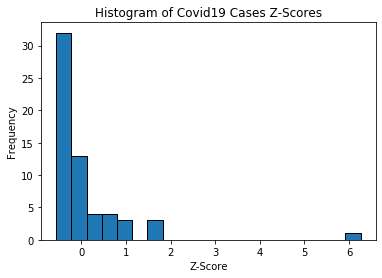

In [58]:
# Demonstrate calculating the z-scores using SciPy
z_scipy_covid = st.zscore(merged_df['Covid19 Cases'])
print(f"The z-scores using the SciPy module are {z_scipy_covid}")

plt.hist(z_scipy_covid, bins=20, edgecolor='black')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Histogram of Covid19 Cases Z-Scores')
plt.show()

Covid19 Cases follow a similar pattern to Unemployment where the data is not normally distributed and skews right. 

Statistics for CPI

In [59]:
# Demonstrate calculating measures of central tendency
mean_CPI_numpy = np.mean(merged_df['CPI'])
print(f"The mean CPI from 2018 to 2022 is {mean_CPI_numpy}")

median_CPI_numpy = np.median(merged_df['CPI'])
print(f"The median CPI from 2018 to 2022 is {median_CPI_numpy}")

mode_CPI_scipy = st.mode(merged_df['CPI'])
print(f"The mode CPI from 2018 to 2022 is {mode_CPI_scipy}")

# Calculate the min and max 
max_CPI_rate = merged_df['CPI'].max()
print(f"The max CPI from 2018 to 2022 is {max_CPI_rate}")

min_CPI_rate = merged_df['CPI'].min()
print(f"The min CPI from 2018 to 2022 is {min_CPI_rate}")

# Calculate the variance and standard deviation
var_CPI_numpy = np.var(merged_df['CPI'],ddof = 0)
print(f"The population variance using the NumPy module is {var_CPI_numpy}")

sd_CPI_numpy = np.std(merged_df['CPI'],ddof = 0)
print(f"The population standard deviation using the NumPy module is {sd_CPI_numpy}")

# Calculate the 68-95-99.7 rule using the standard deviation
print(f"Roughly 68% of the data is between {round(mean_CPI_numpy-sd_CPI_numpy,3)} and {round(mean_CPI_numpy+sd_CPI_numpy,3)}")
print(f"Roughly 95% of the data is between {round(mean_CPI_numpy-2*sd_CPI_numpy,3)} and {round(mean_CPI_numpy+2*sd_CPI_numpy,3)}")
print(f"Roughly 99.7% of the data is between {round(mean_CPI_numpy-3*sd_CPI_numpy,3)} and {round(mean_CPI_numpy+3*sd_CPI_numpy,3)}")

The mean CPI from 2018 to 2022 is 265.8342
The median CPI from 2018 to 2022 is 258.84450000000004
The mode CPI from 2018 to 2022 is ModeResult(mode=array([248.743]), count=array([1]))
The max CPI from 2018 to 2022 is 298.349
The min CPI from 2018 to 2022 is 248.743
The population variance using the NumPy module is 236.6296895266665
The population standard deviation using the NumPy module is 15.38277249154607
Roughly 68% of the data is between 250.451 and 281.217
Roughly 95% of the data is between 235.069 and 296.6
Roughly 99.7% of the data is between 219.686 and 311.983


The z-scores using the SciPy module are [-1.11106109 -1.06581567 -1.05658457 -1.01985517 -0.97870524 -0.9566676
 -0.943341   -0.91564768 -0.88379387 -0.84329402 -0.85662061 -0.86351144
 -0.86877707 -0.82554689 -0.75156803 -0.6937111  -0.68317984 -0.68083956
 -0.64580036 -0.62766319 -0.60055494 -0.55446442 -0.52306566 -0.49218696
 -0.4649487  -0.44382116 -0.49855772 -0.63318885 -0.64294002 -0.5601851
 -0.47398478 -0.4065717  -0.36691695 -0.35638569 -0.33239782 -0.27759625
 -0.2362513  -0.16175238 -0.05240928  0.05803895  0.17973353  0.33289188
  0.41278645  0.47181352  0.54475225  0.69921076  0.82493582  0.92907829
  1.04654736  1.19274988  1.42196733  1.48404977  1.66678666  1.91732667
  1.91362123  1.93630895  2.01048283  2.09505796  2.1137152   2.09830835]


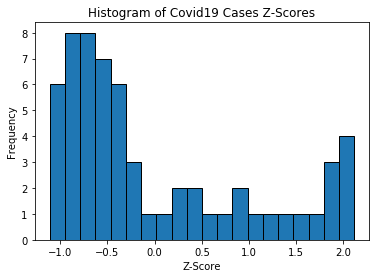

In [60]:
# Demonstrate calculating the z-scores using SciPy
z_scipy_cpi = st.zscore(merged_df['CPI'])
print(f"The z-scores using the SciPy module are {z_scipy_cpi}")

plt.hist(z_scipy_cpi, bins=20, edgecolor='black')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.title('Histogram of Covid19 Cases Z-Scores')
plt.show()

In [61]:
# Run normalty test on the entire population of 60
print(st.normaltest(merged_df['CPI'].sample(60)))

NormaltestResult(statistic=8.964359976575235, pvalue=0.011308733357339966)


We can almost see a similar pattern with CPI data as Unemployment Rates and Covid19 Cases, but, the p-value of 0.011308733357340553 is much closer to 0.05. Regardless, it is still lower than 0.05, so the CPI data is also not normally distributed. 

------------------------------------------------
------------------------------------------------

For all three - Unemployment Rates, CPI and Covid19 Cases - the major reason the data is not normally distributed from 2018 to 2020 is because it is a small data sample (60 only, 12months x 5 years).  Secondly, Covid19 was a great disruptor of data - Covid19 data in the U.S. did not exist prior to 2020 and had such a siginificant impact on the economy and much more. 

# Creating charts with the Unemployment Rates, CPI and Covid19 Case data

Plot the Unemployment Rates

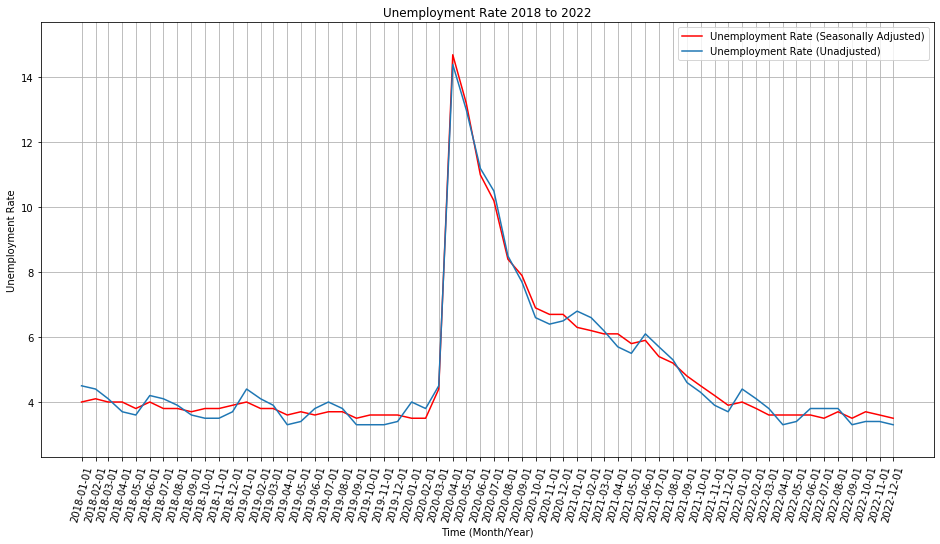

In [62]:
# Plot both Seasonally Adjusted (S) and Unadjusted (U) Unemployment Rates in the same chart

plt.figure(figsize=(16,8))

# Plot the first line chart
plt.plot(merged_df['Date'], merged_df['Unemployment Rate (S)'], label='Unemployment Rate (Seasonally Adjusted)', color='red')

# Plot the second line chart
plt.plot(merged_df['Date'], merged_df['Unemployment Rate (U)'], label='Unemployment Rate (Unadjusted)')

# Incorporate the other graph properties
plt.xlabel('Time (Month/Year)')
plt.ylabel('Unemployment Rate')
plt.title('Unemployment Rate 2018 to 2022')
plt.ylim(min(merged_df['Unemployment Rate (S)'].min(), merged_df['Unemployment Rate (U)'].min())-1, max(merged_df['Unemployment Rate (S)'].max(), merged_df['Unemployment Rate (U)'].max())+1)
plt.xticks(merged_df['Date'], rotation=75)
plt.grid()

# Add the legend
plt.legend()

# Save the figure
plt.savefig('../output/Unemployment_Seas_Unadj_2018-2022.png', dpi=300)

# Show the line plot
plt.show()



Key Observations:

- U.S. unemployment was at a low of 3.5% in February 2020 before a sharp increase to 14.7% in April 2020.
- There is consensus that the Covid19 pandemic had significant impact on the labor market leading to widespread job losses. 
- Throughout 2020, unemployment steadily declined from its peak to 6.7% in December 2020
- As of December 2022, unemployment is back to 3.5%

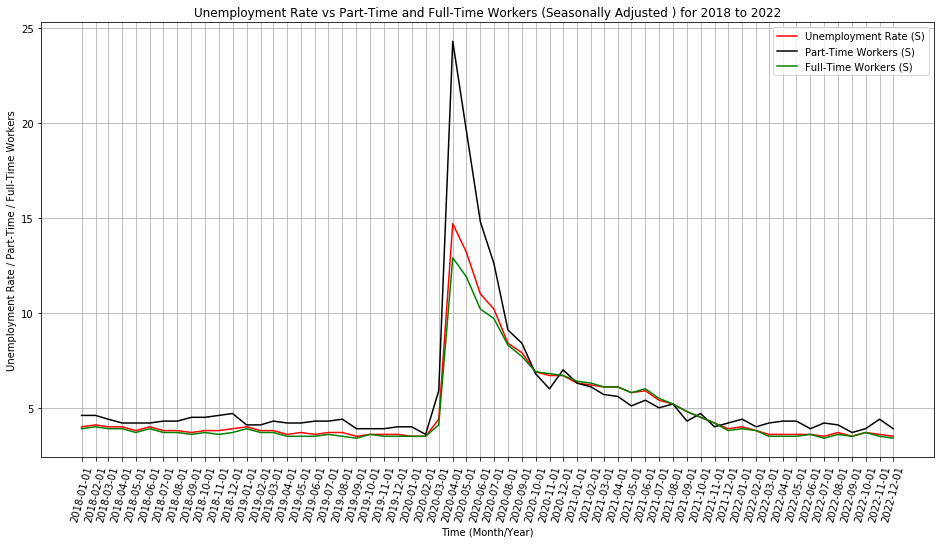

In [63]:
# Plot the Seasonally Adjusted (S) Unemployment Rate vs the Seasonally Adjusted (S) Part Time and Full Time

plt.figure(figsize=(16,8))

# Plot the first line chart
plt.plot(merged_df['Date'], merged_df['Unemployment Rate (S)'], label='Unemployment Rate (S)', color='red')

# Plot the second line chart
plt.plot(merged_df['Date'], merged_df['Part-Time Workers (S)'], label='Part-Time Workers (S)', color='black')

# Plot the third line chart
plt.plot(merged_df['Date'], merged_df['Full-Time Workers (S)'], label='Full-Time Workers (S)', color='green')

# Incorporate the other graph properties
plt.xlabel('Time (Month/Year)')
plt.ylabel('Unemployment Rate / Part-Time / Full-Time Workers')
plt.title('Unemployment Rate vs Part-Time and Full-Time Workers (Seasonally Adjusted ) for 2018 to 2022')
plt.ylim(min(merged_df['Unemployment Rate (S)'].min(), merged_df['Part-Time Workers (S)'].min(), merged_df['Full-Time Workers (S)'].min())-1, max(merged_df['Unemployment Rate (S)'].max(), merged_df['Part-Time Workers (S)'].max(), merged_df['Full-Time Workers (S)'].max())+1)
plt.xticks(merged_df['Date'], rotation=75)
plt.grid()

# Add the legend
plt.legend()

# Save the figure
plt.savefig('../output/Unemployment_Seas_Part&Fulltime_2018-2022.png', dpi=300)

# Show the line plot
plt.show()

Key Observations of Nat'l Unemployment vs. Part-Time Workers vs. Full-Time Workers:

- Part-Time workers were disproportionally impacted by the Covid19 shutdowns.  At the peak, the Part-Time workers unemployment rate was 24.3% compared to Full-Time workers at 12.9% and the national rate of 14.7%
- Part-time workers are often concentrated in industries that were heavily impacted by the shutdowns, such as retail, hospitality, and leisure.
- Part-time workers are less likely to have the option to work from home, as many part-time jobs are in industries that require in-person work.
- Part-time workers are vulnerable to lay-offs are and are more likely to be laid off during economic downturns, as businesses look to cut costs. 

<Figure size 1152x576 with 0 Axes>

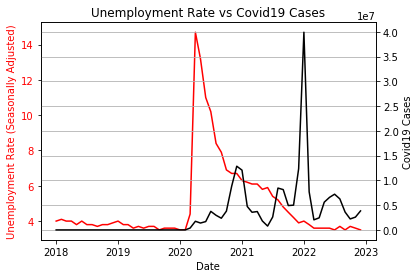

In [64]:
# Plot the Seasonally Adjusted (S) Unemployment Rate vs Covid19 Cases to see if there is actual correlation

plt.figure(figsize=(16,8))

# Ceate two line plots, Unemployment and Covid Cases, into a single chart using the subplot function 
fig, axis1 = plt.subplots()

# Plot Unemployment on the left y-axis
axis1.set_xlabel('Date')
axis1.set_ylabel('Unemployment Rate (Seasonally Adjusted)', color='red')
axis1.plot(merged_df['Date'], merged_df['Unemployment Rate (S)'], color='red')
axis1.tick_params(axis='y', labelcolor='red')

# Create a second axis shared with the first one, parallel to the original y-axis above
axis2 = axis1.twinx()

# Plot Covid on the right x-axis
axis2.set_ylabel('Covid19 Cases', color='black')
axis2.plot(merged_df['Date'], merged_df['Covid19 Cases'], color='black')
axis2.tick_params(axis='y', labelcolor='black')

# Incorporate the other graph properties
plt.grid()
plt.title('Unemployment Rate vs Covid19 Cases')

# Save the figure
plt.savefig('../output/Unemployment_vs_Covid19_2018-2022.png', dpi=300)

# Show the line plot
plt.show()

<Figure size 1152x576 with 0 Axes>

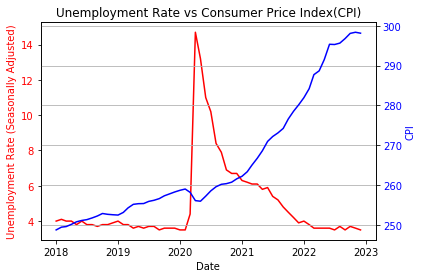

In [65]:
# Plot the Seasonally Adjusted (S) Unemployment Rate vs CPI to see if there is actual correlation

plt.figure(figsize=(16,8))

# Ceate two line plots, Unemployment and Covid Cases, into a single chart using the subplot function 
fig2, axis1 = plt.subplots()

# Plot Unemployment on the left y-axis
axis1.set_xlabel('Date')
axis1.set_ylabel('Unemployment Rate (Seasonally Adjusted)', color='red')
axis1.plot(merged_df['Date'], merged_df['Unemployment Rate (S)'], color='red')
axis1.tick_params(axis='y', labelcolor='red')

# Create a second axis shared with the first one, parallel to the original y-axis above
axis2 = axis1.twinx()

# Plot Covid on the right x-axis
axis2.set_ylabel('CPI', color='blue')
axis2.plot(merged_df['Date'], merged_df['CPI'], color='blue')
axis2.tick_params(axis='y', labelcolor='blue')

# Incorporate the other graph properties
plt.grid()
plt.title('Unemployment Rate vs Consumer Price Index(CPI)')

# Save the figure
plt.savefig('../output/Unemployment_vs_CPI_2018-2022.png', dpi=300)

# Show the line plot
plt.show()

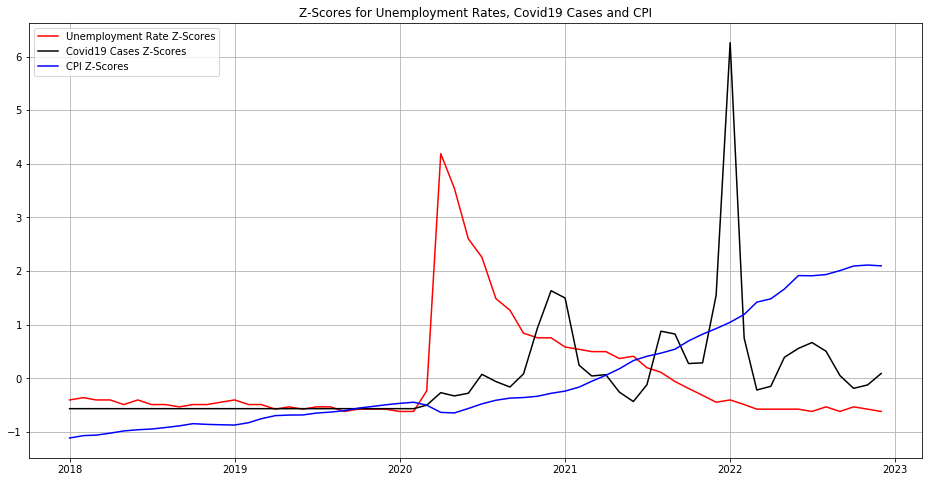

In [66]:
# Using the Z-Scores calculated earlier to plot Unemployment, Covid19 Cases and CPI

plt.figure(figsize=(16,8))

# Plot the second line chart
plt.plot(merged_df['Date'], z_scipy, label='Unemployment Rate Z-Scores', color='red')

# Plot the second line chart
plt.plot(merged_df['Date'], z_scipy_covid, label='Covid19 Cases Z-Scores', color='black')

# Plot the third line chart
plt.plot(merged_df['Date'], z_scipy_cpi, label='CPI Z-Scores', color='blue')

# Incorporate the other graph properties
plt.grid()
plt.legend()
plt.title('Z-Scores for Unemployment Rates, Covid19 Cases and CPI')


# Show the line plot
plt.show()

# Finding Correlation between Unemployment, Covid19 Cases, CPI

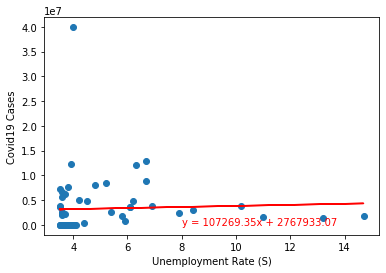

In [75]:
# Use scatter plot to plot Unemployment Rate and Covid19 Cases
x_val = merged_df['Unemployment Rate (S)']
y_val = merged_df['Covid19 Cases']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
regress_values = x_val * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val, y_val)
plt.plot(x_val,regress_values,"r-")
plt.annotate(line_eq,(8,10),fontsize=10,color="red")
plt.xlabel('Unemployment Rate (S)')
plt.ylabel('Covid19 Cases')
plt.show()


In [68]:
# Compute the Pearson correlation coefficient between Covid19 and Unemployment
correlation = st.pearsonr(merged_df['Unemployment Rate (S)'], merged_df['Covid19 Cases'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.04


 According an online article published by the Bureau of Labor Statistics on June 2021, "...[a] decade-long economic expansion ended early in 2020, as the coronavirus disease 2019 (COVID-19) pandemic and efforts to contain it led businesses to suspend operations or close, resulting in a record number of temporary layoffs. The pandemic also prevented many people from looking for work."  

However, based on the Pearson’s Correlation, a correlation coefficient of less than < 0.3 means there is no correlation or it is very weak. Therefore, simply comparing the number of Covid19 cases by itself to the Unemployment Rate is not enough to show correlation.  We must also look at other factors such as industry, state, number of remote workers, etc. to get an overall better picture of the cause of unemployment

BLS Article: https://www.bls.gov/opub/mlr/2021/article/unemployment-rises-in-2020-as-the-country-battles-the-covid-19-pandemic.htm#:~:text=A%20decade%2Dlong%20economic%20expansion,people%20from%20looking%20for%20work.

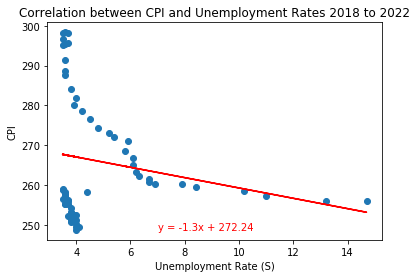

In [69]:
# Use scatter plot to plot Unemployment Rate and CPI

x_val2 = merged_df['Unemployment Rate (S)']
y_val2 = merged_df['CPI']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val2, y_val2)
regress_values2 = x_val2 * slope + intercept
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val2, y_val2)
plt.plot(x_val2,regress_values2,"r-")
plt.annotate(line_eq2,(7,y_val2.min()),fontsize=10,color="red")
plt.title('Correlation between CPI and Unemployment Rates 2018 to 2022')
plt.xlabel('Unemployment Rate (S)')
plt.ylabel('CPI')
plt.show()

In [70]:
# Compute the Pearson correlation coefficient between CPIand Unemployment
correlation = st.pearsonr(merged_df['Unemployment Rate (S)'], merged_df['CPI'])
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is -0.2


In [71]:
# Create a new DataFrame starting April 2020 to December 2023 to prove the negative correlation
merged2020_2022_df = merged_df[(merged_df["Year"] == 2020)  | (merged_df["Year"] == 2021) | (merged_df["Year"] == 2022)]
merged2020_2022_df.head()

,Date,Unemployment Rate (S),Unemployment Rate (U),Women (S),Men (S),Part-Time Workers (S),Full-Time Workers (S),CPI,Covid19 Cases,Year
24,2020-01-01,3.5,4.0,3.5,3.5,4.0,3.5,258.682,14.0,2020
25,2020-02-01,3.5,3.8,3.4,3.5,3.6,3.5,259.007,35.0,2020
26,2020-03-01,4.4,4.5,4.4,4.4,5.9,4.1,258.165,378228.0,2020
27,2020-04-01,14.7,14.4,16.2,13.5,24.3,12.9,256.094,1744078.0,2020
28,2020-05-01,13.2,13.0,14.5,12.1,19.6,11.9,255.944,1389120.0,2020


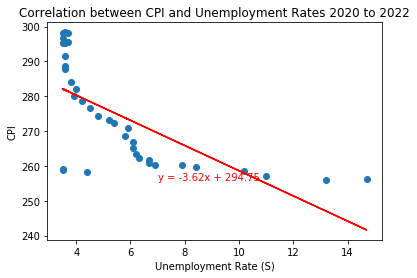

In [72]:
x_val3 = merged2020_2022_df['Unemployment Rate (S)']
y_val3 = merged2020_2022_df['CPI']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val3, y_val3)
regress_values3 = x_val3 * slope + intercept
line_eq3 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_val3, y_val3)
plt.plot(x_val3,regress_values3,"r-")
plt.annotate(line_eq3,(7,y_val3.min()),fontsize=10,color="red")
plt.title('Correlation between CPI and Unemployment Rates 2020 to 2022')
plt.xlabel('Unemployment Rate (S)')
plt.ylabel('CPI')
plt.show()

In [73]:
# Compute the Pearson correlation coefficient between CPI and Unemployment 2020 to 2022
correlation2 = st.pearsonr(merged2020_2022_df['Unemployment Rate (S)'],merged2020_2022_df['CPI'])
print(f"The correlation between both factors is {round(correlation2[0],2)}")

The correlation between both factors is -0.68


According to a recent CNBC article, the recent layoffs in the technology industry “come in a period of slowing growth, higher interest rates to battle inflation, and fears of a possible recession next year.”

A well-known indicator of inflation is the Consumer Price Index (CPI), a measure of the average change overtime in the prices paid by urban consumers for a market basket of consumer goods and services 

According to Investopedia, CPI is not a direct indicator but "inflation and unemployment has traditionally been an inverse correlation”. 

The correlation coefficient of Unemployment Rate and CPI is -0.2 which proves the negative correlation, but it is still less than < 0.3 which can mean there is no correlation, or it is very weak. However, if only look from April 2020 to December 2022, the correlation coefficient becomes stronger at -0.68. 
 

# Citation of Data Source 

Office of Unemployment and Unemployment Statistics (2023, February). (Seas) Unemployment Rate. BLS Beta Labs. https://beta.bls.gov/dataViewer/view/timeseries/LNS14000000

Office of Unemployment and Unemployment Statistics (2023, February). (Unadj) Unemployment Rate. BLS Beta Labs. https://beta.bls.gov/dataViewer/view/timeseries/LNU04000000

Office of Unemployment and Unemployment Statistics (2023, February). (Seas) Unemployment Rate - Women. BLS Beta Labs. https://beta.bls.gov/dataViewer/view/timeseries/LNS14000002

Office of Unemployment and Unemployment Statistics (2023, February). (Seas) Unemployment Rate - Men. BLS Beta Labs. https://beta.bls.gov/dataViewer/view/timeseries/LNS14000001

Office of Unemployment and Unemployment Statistics (2023, February). (Seas) Unemployment Rate Part-Time Workers. BLS Beta Labs. https://beta.bls.gov/dataViewer/view/timeseries/LNS14200000

Office of Unemployment and Unemployment Statistics (2023, February). (Seas) Unemployment Rate Full-Time Workers. BLS Beta Labs. https://beta.bls.gov/dataViewer/view/timeseries/LNS14100000

Office of Unemployment and Unemployment Statistics (2021, June). Unemployment rises in 2020, as the country battles the COVID-19 pandemic. https://www.bls.gov/opub/mlr/2021/article/unemployment-rises-in-2020-as-the-country-battles-the-covid-19-pandemic.htm#:~:text=A%20decade%2Dlong%20economic%20expansion,people%20from%20looking%20for%20work.

Office of Unemployment and Unemployment Statistics (2022, June). U.S. labor market shows improvement in 2021, but the COVID-19 pandemic continues to weigh on the economy. https://www.bls.gov/opub/mlr/2022/article/us-labor-market-shows-improvement-in-2021-but-the-covid-19-pandemic-continues-to-weigh-on-the-economy.htm

Office of Unemployment and Unemployment Statistics (2023, February). Consumer Price Index. https://www.bls.gov/cpi/questions-and-answers.htm

FRED Economic Data (2023, February). Consumer Price Index for All Urban Consumers: All Items in U.S. City Average. https://fred.stlouisfed.org/series/CPIAUCSL

Kaggle (2023, February). COVID-19 data from Center for Systems Science and Engineering (CSSE) at Johns Hopkins University. https://www.kaggle.com/datasets/antgoldbloom/covid19-data-from-john-hopkins-university?select=CONVENIENT_us_confirmed_cases.csv

Investopedia (2022, July). How Inflation and Unemployment Are Related. https://www.investopedia.com/articles/markets/081515/how-inflation-and-unemployment-are-related.asp

CNBC.com (2023, January). Google, Microsoft, Amazon and other tech companies have laid off more than 70,000 employees in the last year. https://www.cnbc.com/2023/01/18/tech-layoffs-microsoft-amazon-meta-others-have-cut-more-than-60000.html
